# Prosper Loan Data Project

## Import Functions

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import numpy as np
import pandas as pd
import seaborn as sns
import time

from scipy.stats import mode
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.set_option('display.max_columns', 80)
pd.options.display.max_columns

80

### Make Some important Functions

In [ ]:
def Mode(x):
    return x.mode()[0]

def XY_Labels (x,y):
    X = plt.xlabel(x, fontsize = 15)
    Y = plt.ylabel(y, fontsize = 15)
    return (X,Y)

def label_encoder(b):
    le= preprocessing.LabelEncoder()
    return le.fit_transform(b)

## Data Wrangling

### Load and discover data

In [ ]:
df = pd.read_csv('prosperLoanData.csv')
df.head(7)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,...,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,...,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,...,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,...,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,

In [ ]:
print(df.shape)

(113937, 81)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [ ]:
print(df.columns)

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

### Make a new df with the important columns i will use

In [ ]:
new_df = df[[ 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
'LenderYield', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
'CurrentCreditLines', 'OpenRevolvingAccounts', 'CurrentDelinquencies', 'AmountDelinquent', 'DebtToIncomeRatio', 'IncomeRange',
'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanCurrentDaysDelinquent', 'LoanOriginalAmount', 'LoanOriginationDate',
'MonthlyLoanPayment', 'InvestmentFromFriendsCount']].copy()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ListingNumber               113937 non-null  int64  
 1   ListingCreationDate         113937 non-null  object 
 2   CreditGrade                 28953 non-null   object 
 3   Term                        113937 non-null  int64  
 4   LoanStatus                  113937 non-null  object 
 5   BorrowerAPR                 113912 non-null  float64
 6   BorrowerRate                113937 non-null  float64
 7   LenderYield                 113937 non-null  float64
 8   ProsperRating (numeric)     84853 non-null   float64
 9   ProsperRating (Alpha)       84853 non-null   object 
 10  ProsperScore                84853 non-null   float64
 11  ListingCategory (numeric)   113937 non-null  int64  
 12  BorrowerState               108422 non-null  object 
 13  Occupation    

In [ ]:
new_df.head(7)

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenRevolvingAccounts,CurrentDelinquencies,AmountDelinquent,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,InvestmentFromFriendsCount
0,193129,2007-08-26 19:09:29.263000000,C,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,NaN,0,CO,Other,Self-employed,True,True,640.0,659.0,5.0,1,2.0,472.0,0.17,"$25,000-49,999",True,3083.333333,0,9425,2007-09-12 00:00:00,330.43,0
1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,0.12016,0.0920,0.0820,6.0,A,7.0,2,CO,Professional,Employed,False,False,680.0,699.0,14.0,13,0.0,0.0,0.18,"$50,000-74,999",True,6125.000000,0,10000,2014-03-03 00:00:00,318.93,0
2,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,NaN,0,GA,Other,Not available,False,True,480.0,499.0,NaN,0,1.0,NaN,0.06,Not displayed,True,2083.333333,0,3001,2007-01-17 00:00:00,123.32,0
3,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,0.12528,0.0974,0.0874,6.0,A,9.0,16,GA,Skilled Labor,Employed,True,False,800.0,819.0,5.0,7,4.0,10056.0,0.15,"$25,000-49,999",True,2875.000000,0,10000,2012-11-01 00:00:00,321.45,0
4,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,0.24614,0.2085,0.1985,3.0,D,4.0,2,MN,Executive,Employed,True,False,680.0,699.0,19.0,6,0.0,0.0,0.26,"$100,000+",True,9583.333333,0,15000,2013-09-20 00:00:00,563.97,0
5,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,0.15425,0.1314,0.1214,5.0,B,10.0,1,NM,Professional,Employed,True,False,740.0,759.0,21.0,13,0.0,0.0,0.36,"$100,000+",True,8333.333333,0,15000,2013-12-24 00:00:00,342.37,0
6,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,0.31032,0.2712,0.2612,2.0,E,2.0,1,KS,Sales - Retail,Employed,False,False,680.0,699.0,10.0,6,0.0,0.0,0.27,"$25,000-49,999",True,2083.333333,0,3000,2013-04-18 00:00:00,122.67,0


## Clean our data and Create a new columns

In [ ]:
new_df['ListingCreationDate'] = pd.to_datetime(new_df['ListingCreationDate'])
new_df['LoanOriginationDate'] = pd.to_datetime(new_df['LoanOriginationDate'])

new_df['Date'] = new_df['ListingCreationDate'].dt.date
new_df['Year'] = new_df['ListingCreationDate'].dt.year
new_df['Month'] = new_df['ListingCreationDate'].dt.month

print(new_df['Date'].dtypes)
print(new_df['Year'].dtypes)
print(new_df['Month'].dtypes)

object
int64
int64


In [ ]:
new_df['Date'] = pd.to_datetime(new_df['Date'])
print(new_df['Date'].dtypes)
#new_df['Month'] = new_df['Date'].dt.month_name()
#print(new_df['Month'].unique())

datetime64[ns]


In [ ]:
new_df['ListingCategory (numeric)'].replace({ 0 : 'Not_Available', 1 : 'Debt_Consolidation', 2 : 'Home_Improvement',
        3 : 'Business', 4 : 'Personal_Loan', 5 : 'Student_Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 9 : 'Boat',
        10 : 'Cosmetic_Procedure', 11 : 'Engagement_Ring', 12 : 'Green_Loans', 13 : 'Household_Expenses',
        14 : 'Large_Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation',
        20 : 'Wedding_Loans' }, inplace=True)

In [ ]:
new_df.rename(columns = { 'ListingNumber' : 'ListingID',
                          'ListingCategory (numeric)' : 'ListingCategory' }, inplace = True)
new_df['ListingCategory'].value_counts()

Debt_Consolidation    58308
Not_Available         16965
Other                 10494
Home_Improvement       7433
Business               7189
Auto                   2572
Personal_Loan          2395
Household_Expenses     1996
Medical/Dental         1522
Taxes                   885
Large_Purchases         876
Wedding_Loans           771
Vacation                768
Student_Use             756
Motorcycle              304
Engagement_Ring         217
Baby&Adoption           199
Cosmetic_Procedure       91
Boat                     85
Green_Loans              59
RV                       52
Name: ListingCategory, dtype: int64

In [ ]:
new_df.isnull().sum()

ListingID                         0
ListingCreationDate               0
CreditGrade                   84984
Term                              0
LoanStatus                        0
BorrowerAPR                      25
BorrowerRate                      0
LenderYield                       0
ProsperRating (numeric)       29084
ProsperRating (Alpha)         29084
ProsperScore                  29084
ListingCategory                   0
BorrowerState                  5515
Occupation                     3588
EmploymentStatus               2255
IsBorrowerHomeowner               0
CurrentlyInGroup                  0
CreditScoreRangeLower           591
CreditScoreRangeUpper           591
CurrentCreditLines             7604
OpenRevolvingAccounts             0
CurrentDelinquencies            697
AmountDelinquent               7622
DebtToIncomeRatio              8554
IncomeRange                       0
IncomeVerifiable                  0
StatedMonthlyIncome               0
LoanCurrentDaysDelinquent   

### Handling missing & Null values

In [ ]:
new_df['BorrowerAPR'].fillna(new_df['BorrowerAPR'].mean(), inplace= True)
new_df['BorrowerState'].fillna(new_df['BorrowerState'].mode()[0], inplace= True)
new_df['Occupation'].fillna(new_df['Occupation'].mode()[0], inplace= True)
new_df['EmploymentStatus'].fillna(new_df['EmploymentStatus'].mode()[0], inplace= True)
new_df['CreditScoreRangeLower'].fillna(new_df['CreditScoreRangeLower'].mean(), inplace= True)
new_df['CreditScoreRangeUpper'].fillna(new_df['CreditScoreRangeUpper'].mean(), inplace= True)
new_df['CurrentCreditLines'].fillna(new_df['CurrentCreditLines'].mean(), inplace= True)
new_df['CurrentDelinquencies'].fillna(new_df['CurrentDelinquencies'].mean(), inplace= True)
new_df['AmountDelinquent'].fillna(new_df['AmountDelinquent'].mean(), inplace= True)
new_df['DebtToIncomeRatio'].fillna(new_df['DebtToIncomeRatio'].mean(), inplace= True)

In [ ]:
new_df['AvgCreditScore'] = (new_df['CreditScoreRangeLower'] + new_df['CreditScoreRangeUpper'])/2
print(new_df['AvgCreditScore'].dtypes)

float64


In [ ]:
Num= new_df.select_dtypes('number').columns.to_list()
Obj= new_df.select_dtypes('object').columns.to_list()

Num_df=  new_df[Num]
Obj_df= new_df[Obj]

[new_df[category].value_counts() for category in Obj]

[C     5649
 D     5153
 B     4389
 AA    3509
 HR    3508
 A     3315
 E     3289
 NC     141
 Name: CreditGrade, dtype: int64,
 Current                   56576
 Completed                 38074
 Chargedoff                11992
 Defaulted                  5018
 Past Due (1-15 days)        806
 Past Due (31-60 days)       363
 Past Due (61-90 days)       313
 Past Due (91-120 days)      304
 Past Due (16-30 days)       265
 FinalPaymentInProgress      205
 Past Due (>120 days)         16
 Cancelled                     5
 Name: LoanStatus, dtype: int64,
 C     18345
 B     15581
 A     14551
 D     14274
 E      9795
 HR     6935
 AA     5372
 Name: ProsperRating (Alpha), dtype: int64,
 Debt_Consolidation    58308
 Not_Available         16965
 Other                 10494
 Home_Improvement       7433
 Business               7189
 Auto                   2572
 Personal_Loan          2395
 Household_Expenses     1996
 Medical/Dental         1522
 Taxes                   885
 Large_Purchases

In [ ]:
len(new_df['BorrowerState'].value_counts())

51

In [ ]:
new_df['Occupation'].unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',
     

In [ ]:
new_df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [ ]:
new_df['LoanCurrentDaysDelinquent'].nunique()

2411

In [ ]:
Defaulted_Loan = new_df['LoanCurrentDaysDelinquent'] > 180
Nun_Defaulted_Loan = new_df['LoanCurrentDaysDelinquent'] <= 180
new_df['Defaulted_Loan'] = Defaulted_Loan
new_df['Not_Defaulted_Loan'] = Nun_Defaulted_Loan
new_df['Defaulted_Loan'].unique()

array([False,  True])

In [ ]:
new_df = new_df.drop(columns =['LoanStatus'])
new_df['LoanStatus'] = Defaulted_Loan
new_df['LoanStatus'] = new_df['LoanStatus'].replace( True, 'Defaulted')
new_df['LoanStatus'] = new_df['LoanStatus'].replace( False, 'Not_Defaulted')
new_df.head()

,ListingID,ListingCreationDate,CreditGrade,Term,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenRevolvingAccounts,CurrentDelinquencies,AmountDelinquent,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,InvestmentFromFriendsCount,Date,Year,Month,AvgCreditScore,Defaulted_Loan,Not_Defaulted_Loan,LoanStatus
0,193129,2007-08-26 19:09:29.263,C,36,0.16516,0.1580,0.1380,NaN,NaN,NaN,Not_Available,CO,Other,Self-employed,True,True,640.0,659.0,5.000000,1,2.0,472.000000,0.17,"$25,000-49,999",True,3083.333333,0,9425,2007-09-12,330.43,0,2007-08-26,2007,8,649.5,False,True,Not_Defaulted
1,1209647,2014-02-27 08:28:07.900,NaN,36,0.12016,0.0920,0.0820,6.0,A,7.0,Home_Improvement,CO,Professional,Employed,False,False,680.0,699.0,14.000000,13,0.0,0.000000,0.18,"$50,000-74,999",True,6125.000000,0,10000,2014-03-03,318.93,0,2014-02-27,2014,2,689.5,False,True,Not_Defaulted
2,81716,2007-01-05 15:00:47.090,HR,36,0.28269,0.2750,0.2400,NaN,NaN,NaN,Not_Available,GA,Other,Not available,False,True,480.0,499.0,10.317192,0,1.0,984.507059,0.06,Not displayed,True,2083.333333,0,3001,2007-01-17,123.32,0,2007-01-05,2007,1,489.5,False,True,Not_Defaulted
3,658116,2012-10-22 11:02:35.010,NaN,36,0.12528,0.0974,0.0874,6.0,A,9.0,Motorcycle,GA,Skilled Labor,Employed,True,False,800.0,819.0,5.000000,7,4.0,10056.000000,0.15,"$25,000-49,999",True,2875.000000,0,10000,2012-11-01,321.45,0,2012-10-22,2012,10,809.5,False,True,Not_Defaulted
4,909464,2013-09-14 18:38:39.097,NaN,36,0.24614,0.2085,0.1985,3.0,D,4.0,Home_Improvement,MN,Executive,Employed,True,False,680.0,699.0,19.000000,6,0.0,0.000000,0.26,"$100,000+",True,9583.333333,0,15000,2013-09-20,563.97,0,2013-09-14,2013,9,689.5,False,True,Not_Defaulted


In [ ]:
new_df['LoanStatus'].value_counts()

Not_Defaulted    98874
Defaulted        15063
Name: LoanStatus, dtype: int64

## Handling Outliers of the data

C:\Users\WAGDY 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DebtToIncomeRatio'>

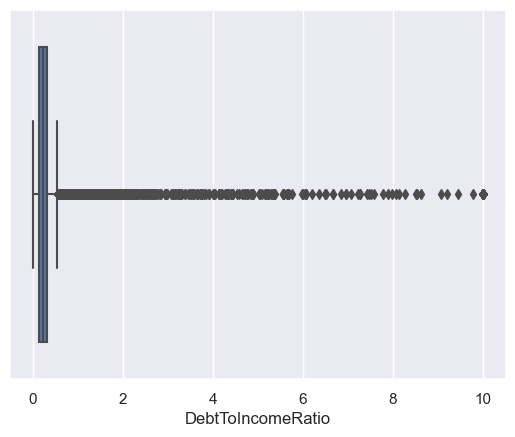

In [ ]:
sns.boxplot(new_df['DebtToIncomeRatio'])

In [ ]:
q1, q3 = np.percentile(new_df['DebtToIncomeRatio'], [25, 75])
iqr = q3 - q1
print("The Inter Quartile Range is: "+ str(iqr))
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = new_df[(new_df['DebtToIncomeRatio'] > upper_bound)]
print("The total number of outliers is: " + str (len(outliers['DebtToIncomeRatio'])))
#print(np.sort(outliers['DebtToIncomeRatio'].unique()))
new_df = new_df[(new_df['DebtToIncomeRatio'] >= lower_bound)
                        & (new_df['DebtToIncomeRatio'] <= upper_bound)]

The Inter Quartile Range is: 0.16
The total number of outliers is: 3517


C:\Users\WAGDY 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DebtToIncomeRatio'>

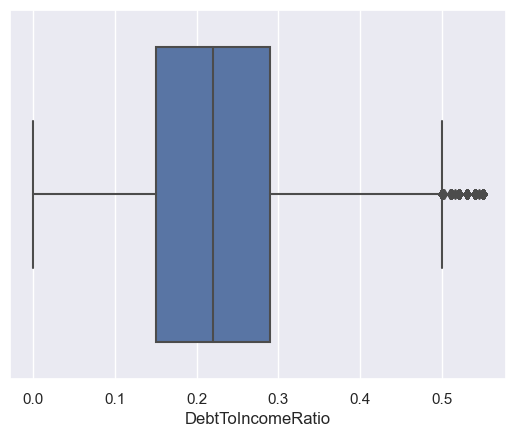

In [ ]:
sns.boxplot(new_df['DebtToIncomeRatio'])

C:\Users\WAGDY 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StatedMonthlyIncome'>

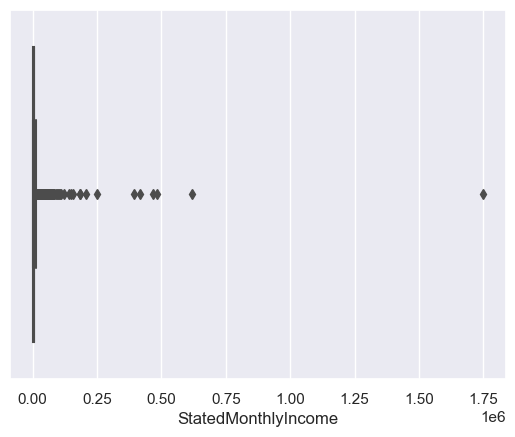

In [ ]:
sns.boxplot(new_df['StatedMonthlyIncome'])

In [ ]:
Q1, Q3 = np.percentile(new_df['StatedMonthlyIncome'], [25, 75])
IQR = Q3 - Q1
print("The Inter Quartile Range is: "+ str(IQR))
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
print(Lower_bound)
print(Upper_bound)
Outliers = new_df[(new_df['StatedMonthlyIncome'] > Upper_bound)]
print("The total number of Outliers is: " + str (len(Outliers['StatedMonthlyIncome'])))
new_df = new_df[(new_df['StatedMonthlyIncome'] >= Lower_bound)
                        & (new_df['StatedMonthlyIncome'] <= Upper_bound)]

The Inter Quartile Range is: 3583.3333340000004
-2041.6666680000003
12291.666668000002
The total number of Outliers is: 5664


C:\Users\WAGDY 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StatedMonthlyIncome'>

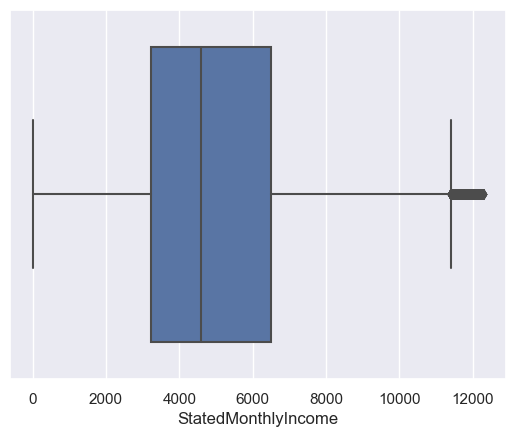

In [ ]:
sns.boxplot(new_df['StatedMonthlyIncome'])

In [ ]:
outliers = new_df[(new_df['DebtToIncomeRatio'] > upper_bound)]
print("The total number of outliers is: " + str (len(outliers['DebtToIncomeRatio'])))
Outliers = new_df[(new_df['StatedMonthlyIncome'] > Upper_bound)]
print("The total number of Outliers is: " + str (len(Outliers['StatedMonthlyIncome'])))

The total number of outliers is: 0
The total number of Outliers is: 0


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104756 entries, 0 to 113936
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   ListingID                   104756 non-null  int64         
 1   ListingCreationDate         104756 non-null  datetime64[ns]
 2   CreditGrade                 26493 non-null   object        
 3   Term                        104756 non-null  int64         
 4   BorrowerAPR                 104756 non-null  float64       
 5   BorrowerRate                104756 non-null  float64       
 6   LenderYield                 104756 non-null  float64       
 7   ProsperRating (numeric)     78139 non-null   float64       
 8   ProsperRating (Alpha)       78139 non-null   object        
 9   ProsperScore                78139 non-null   float64       
 10  ListingCategory             104756 non-null  object        
 11  BorrowerState               104756 non-

In [ ]:
new_df.describe()

,ListingID,Term,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (numeric),ProsperScore,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenRevolvingAccounts,CurrentDelinquencies,AmountDelinquent,DebtToIncomeRatio,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayment,InvestmentFromFriendsCount,Year,Month,AvgCreditScore
count,1.047560e+05,104756.000000,104756.000000,104756.000000,104756.000000,78139.000000,78139.000000,104756.000000,104756.000000,104756.000000,104756.000000,104756.000000,104756.000000,104756.000000,104756.000000,104756.000000,104756.000000,104756.000000,104756.000000,104756.000000,104756.000000,104756.000000
mean,6.297630e+05,40.902134,0.219029,0.192914,0.182842,4.067777,5.928922,684.371161,703.371161,10.065667,6.798293,0.612345,987.051035,0.235491,5009.837919,151.149805,8052.586534,262.779778,0.022853,2011.020677,6.597722,693.871161
std,3.280656e+05,10.462170,0.079956,0.074487,0.074193,1.658187,2.350512,66.610071,66.610071,5.106618,4.507577,2.011109,6741.931066,0.111849,2468.466844,463.835969,5957.680483,182.230998,0.228412,2.501886,3.552876,66.610071
min,6.000000e+00,12.000000,0.006530,0.000000,-0.010000,1.000000,1.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,2005.000000,1.000000,9.500000
25%,4.030102e+05,36.000000,0.157130,0.134900,0.124900,3.000000,4.000000,660.000000,679.000000,7.000000,4.000000,0.000000,0.000000,0.150000,3234.895833,0.000000,3700.000000,129.920000,0.000000,2008.000000,3.000000,669.500000
50%,6.013460e+05,36.000000,0.210250,0.184000,0.174000,4.000000,6.000000,680.000000,699.000000,10.000000,6.000000,0.000000,0.000000,0.230000,4583.333333,0.000000,6000.000000,209.530000,0.000000,2012.000000,7.000000,689.500000
75%,8.978528e+05,36.000000,0.283700,0.250000,0.240000,5.000000,8.000000,720.000000,739.000000,13.000000,9.000000,0.000000,0.000000,0.300000,6500.000000,0.000000,11000.000000,359.770000,0.000000,2013.000000,10.000000,729.500000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,7.000000,11.000000,880.000000,899.000000,59.000000,51.000000,83.000000,444745.000000,0.550000,12291.666667,2704.000000,35000.000000,2218.530000,33.000000,2014.000000,12.000000,889.500000


In [ ]:
[new_df[category].value_counts() for category in Obj]

[C     5177
 D     4771
 B     3870
 HR    3382
 E     3098
 AA    3076
 A     2980
 NC     139
 Name: CreditGrade, dtype: int64,
 Not_Defaulted    91050
 Defaulted        13706
 Name: LoanStatus, dtype: int64,
 C     17134
 B     14357
 D     13361
 A     13273
 E      9146
 HR     6093
 AA     4775
 Name: ProsperRating (Alpha), dtype: int64,
 Debt_Consolidation    53817
 Not_Available         15360
 Other                  9786
 Home_Improvement       6655
 Business               6552
 Auto                   2463
 Personal_Loan          2232
 Household_Expenses     1852
 Medical/Dental         1393
 Large_Purchases         804
 Taxes                   757
 Vacation                721
 Wedding_Loans           710
 Student_Use             709
 Motorcycle              291
 Engagement_Ring         200
 Baby&Adoption           181
 Cosmetic_Procedure       90
 Boat                     83
 Green_Loans              54
 RV                       46
 Name: ListingCategory, dtype: int64,
 CA    

In [ ]:
new_df1 = new_df.dropna(subset=['ProsperRating (Alpha)'])
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78139 entries, 1 to 113936
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ListingID                   78139 non-null  int64         
 1   ListingCreationDate         78139 non-null  datetime64[ns]
 2   CreditGrade                 0 non-null      object        
 3   Term                        78139 non-null  int64         
 4   BorrowerAPR                 78139 non-null  float64       
 5   BorrowerRate                78139 non-null  float64       
 6   LenderYield                 78139 non-null  float64       
 7   ProsperRating (numeric)     78139 non-null  float64       
 8   ProsperRating (Alpha)       78139 non-null  object        
 9   ProsperScore                78139 non-null  float64       
 10  ListingCategory             78139 non-null  object        
 11  BorrowerState               78139 non-null  object   

# Exploratory Data Analysis (EDA)



```
# This is formatted as code
```

## Univariate Analysis

### Question 1 : What are the most number of borrowers Credit Grade?

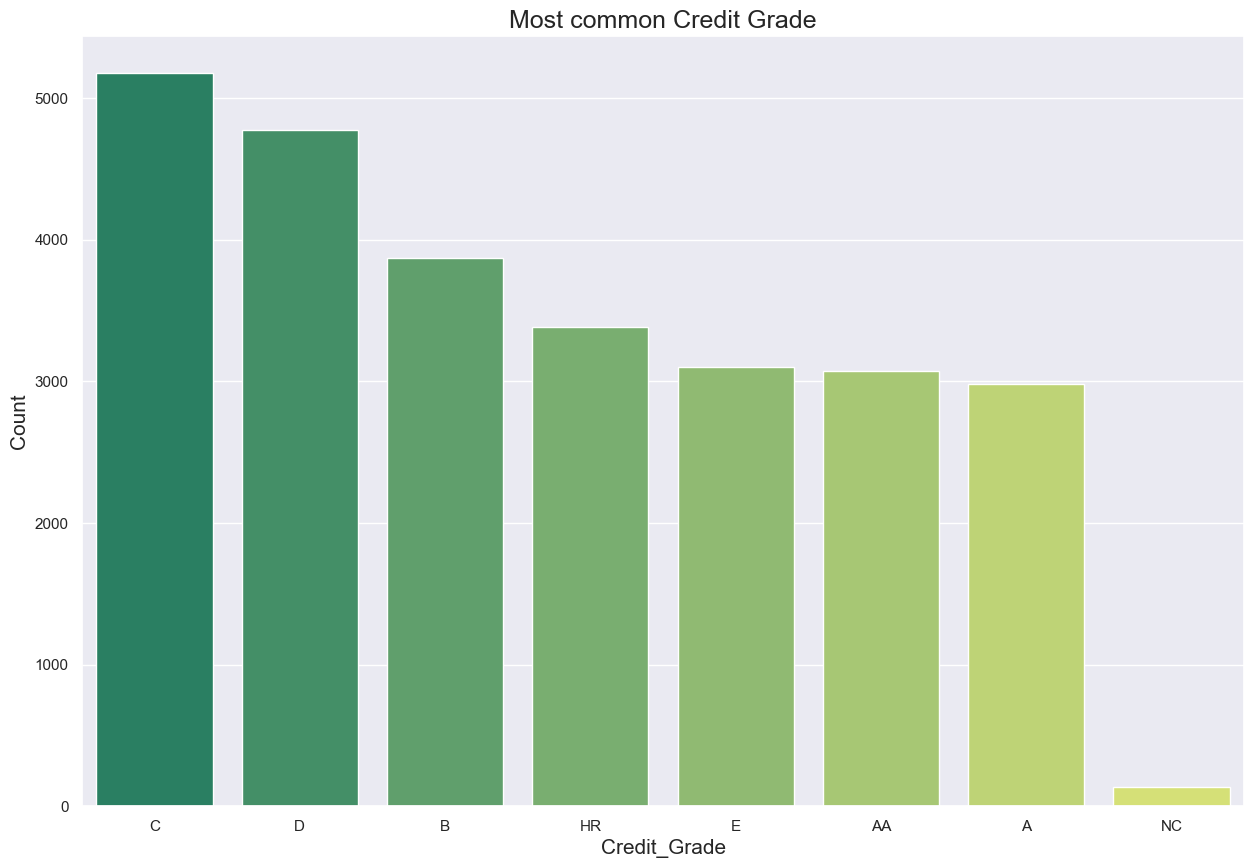

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x= 'CreditGrade', data= new_df, palette= 'summer', order= new_df['CreditGrade'].value_counts(ascending= False).index)
XY_Labels ("Credit_Grade","Count")
plt.title("Most common Credit Grade", fontsize = 18)
plt.show()

### Question 2 : Since there are so much low Credit Grade such as C and D , does it lead to a higher amount of deliquency?

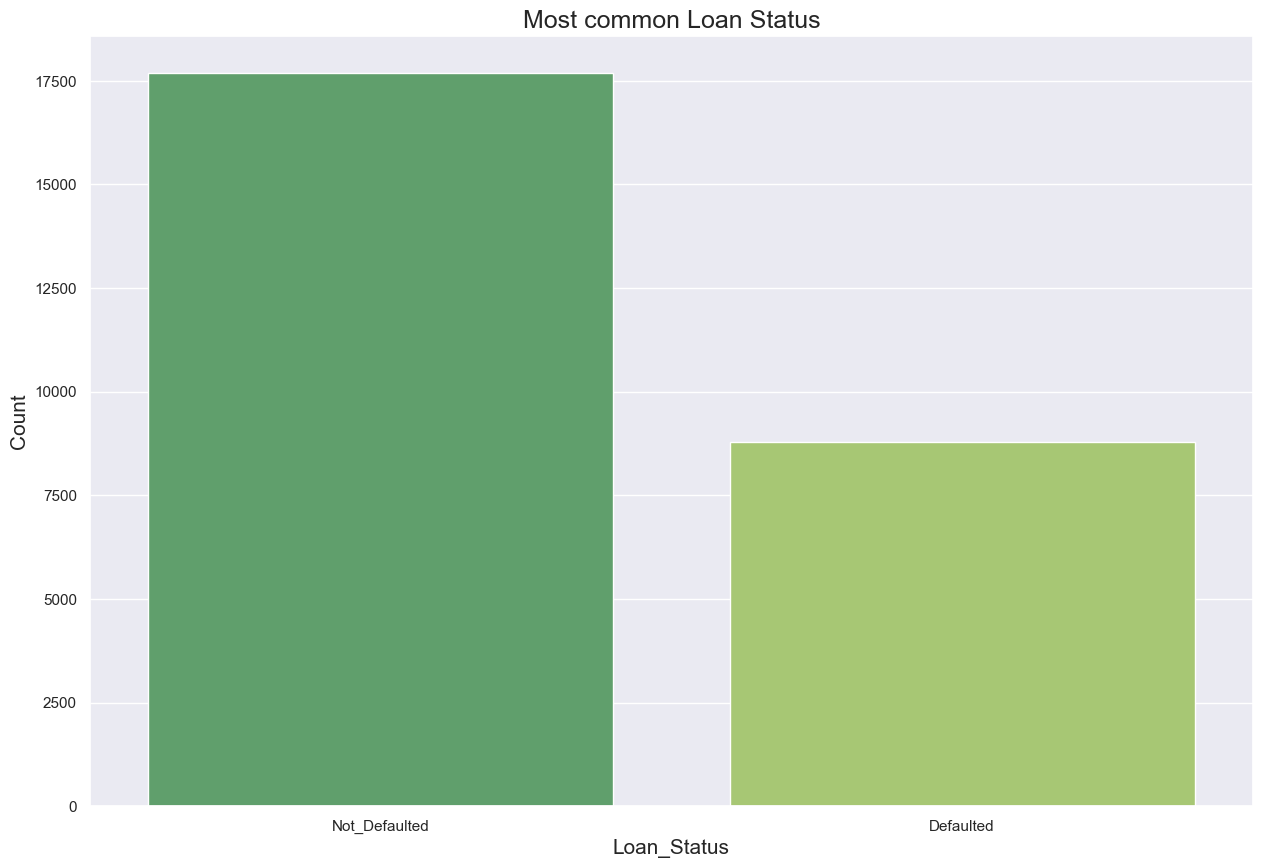

In [ ]:
df2 = new_df.dropna(subset=['CreditGrade'])
plt.figure(figsize=(15,10))
sns.countplot(x= 'LoanStatus', data= df2, palette= 'summer', order= df2['LoanStatus'].value_counts(ascending= False).index)
XY_Labels ("Loan_Status","Count")
plt.title("Most common Loan Status", fontsize = 18)
plt.show()

### Question 3 : What is the highest number of BorrowerRate?

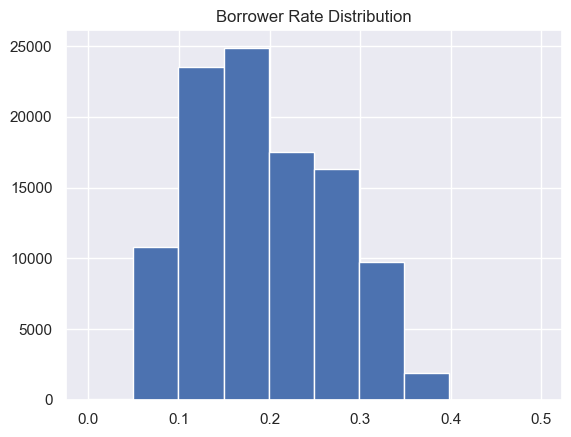

In [ ]:
plt.hist(new_df['BorrowerRate'])
plt.title("Borrower Rate Distribution")
plt.show()

### Question 4 : Since the highest number of Borrower Rate is between 0.1 and 0.2, does the highest number of Lender Yield is between 0.1 and 0.2?

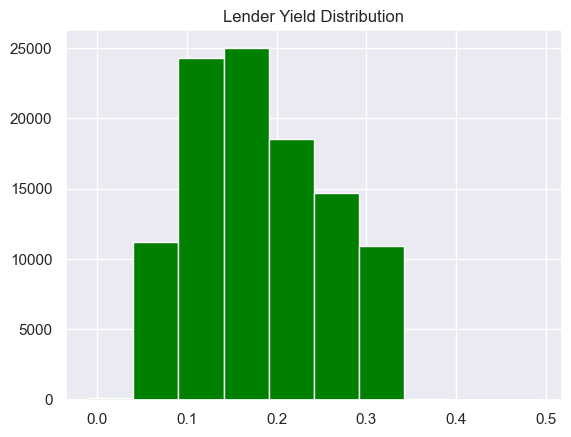

In [ ]:
plt.hist(new_df['LenderYield'], color='green')
plt.title("Lender Yield Distribution")
plt.show()

### Question 5 : Is the Credit Grade really accurate? Does higher Credit Grade leads to higher Monthly Loan Payment? As for Higher Credit Grade we mean from Grade AA to B

C:\Users\WAGDY 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


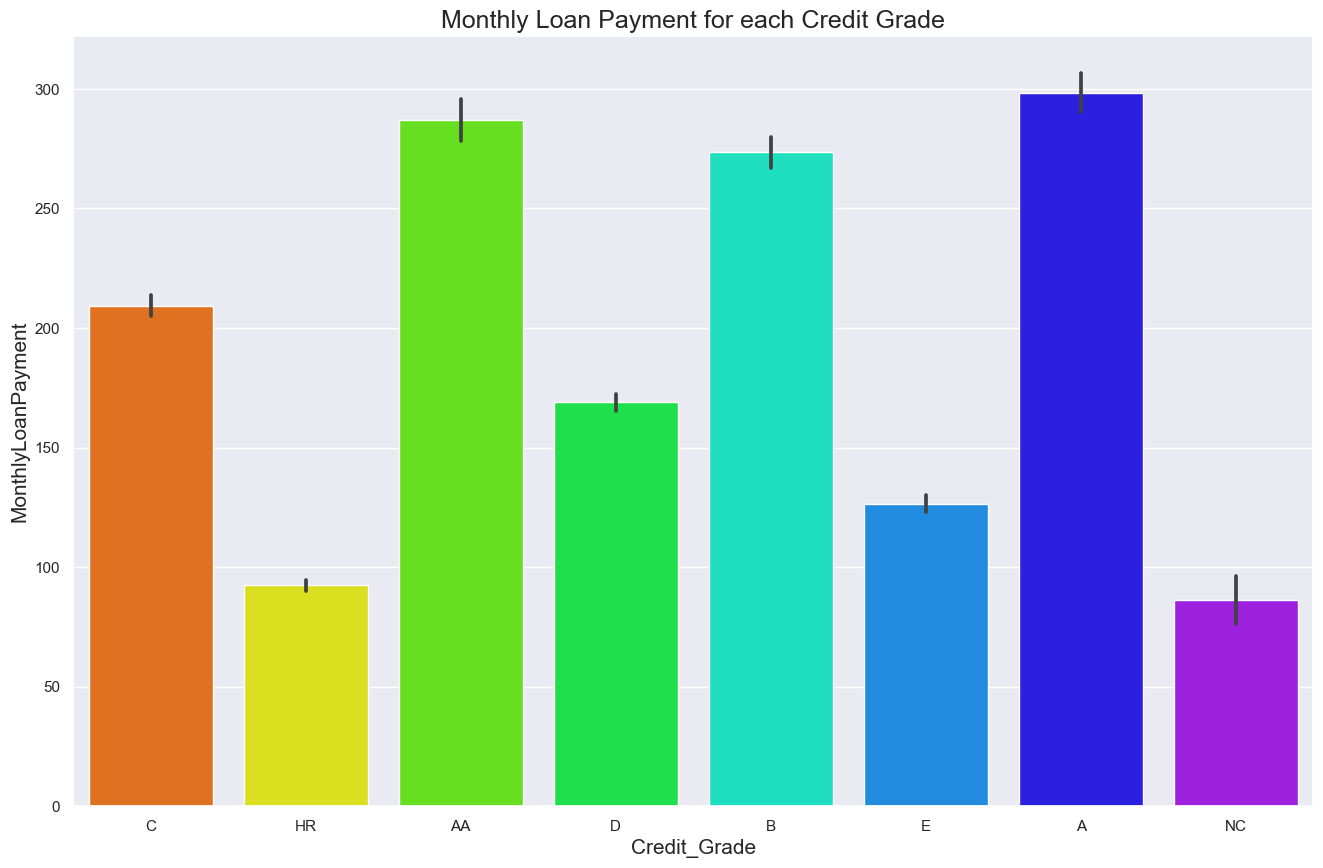

In [ ]:
plt.figure(figsize=(16,10))
sns.barplot('CreditGrade', 'MonthlyLoanPayment', data = df2, palette='gist_rainbow')
XY_Labels ("Credit_Grade", "MonthlyLoanPayment")
plt.title("Monthly Loan Payment for each Credit Grade", fontsize = 18)
plt.show()

### Question 6 : Here we look at the Completed Loan Status and Defaulted Rate to determine the accuracy of Credit Grade.

C:\Users\WAGDY 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


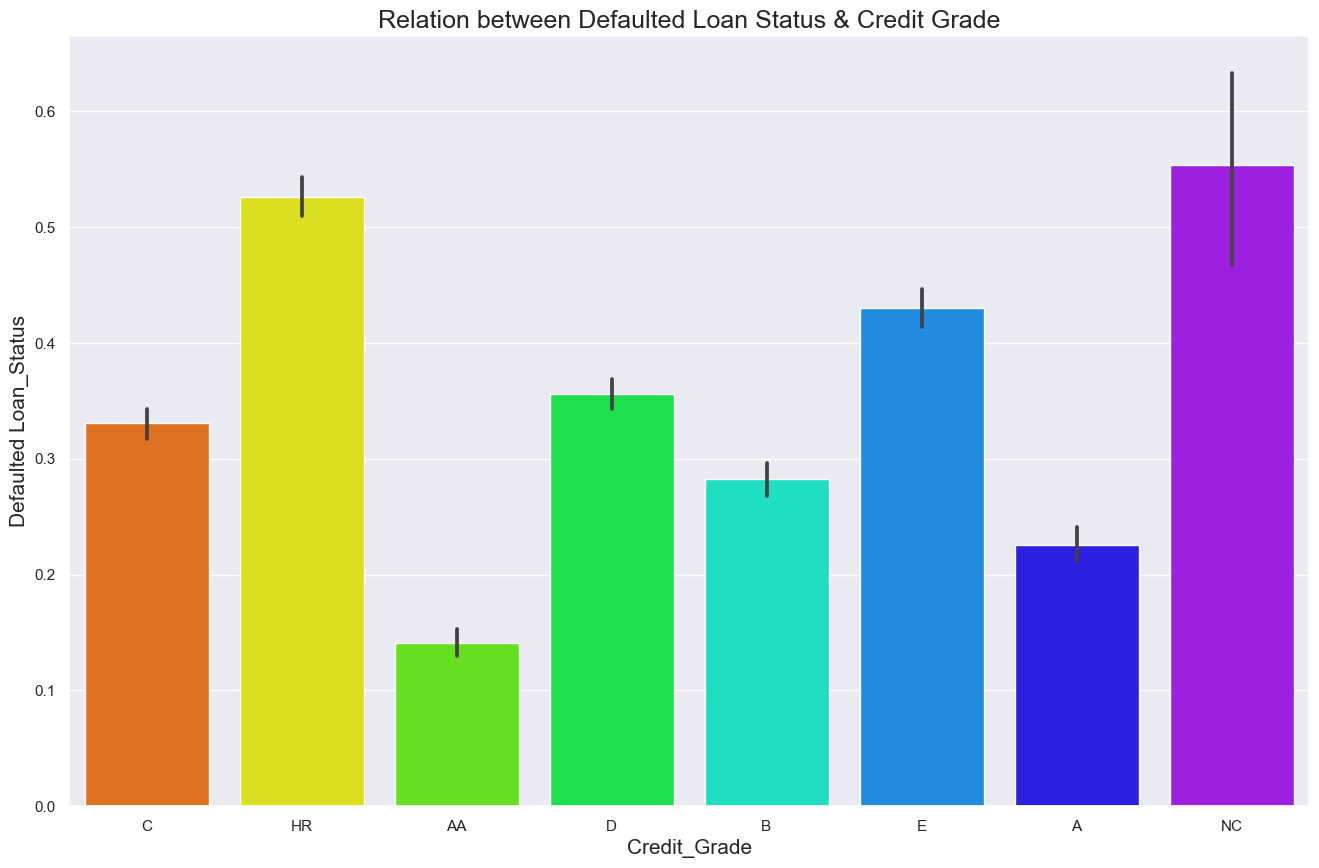

In [ ]:
plt.figure(figsize=(16,10))
sns.barplot('CreditGrade', 'Defaulted_Loan', data = df2, palette='gist_rainbow')
XY_Labels ("Credit_Grade", "Defaulted Loan_Status")
plt.title("Relation between Defaulted Loan Status & Credit Grade", fontsize = 18)
plt.show()

C:\Users\WAGDY 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


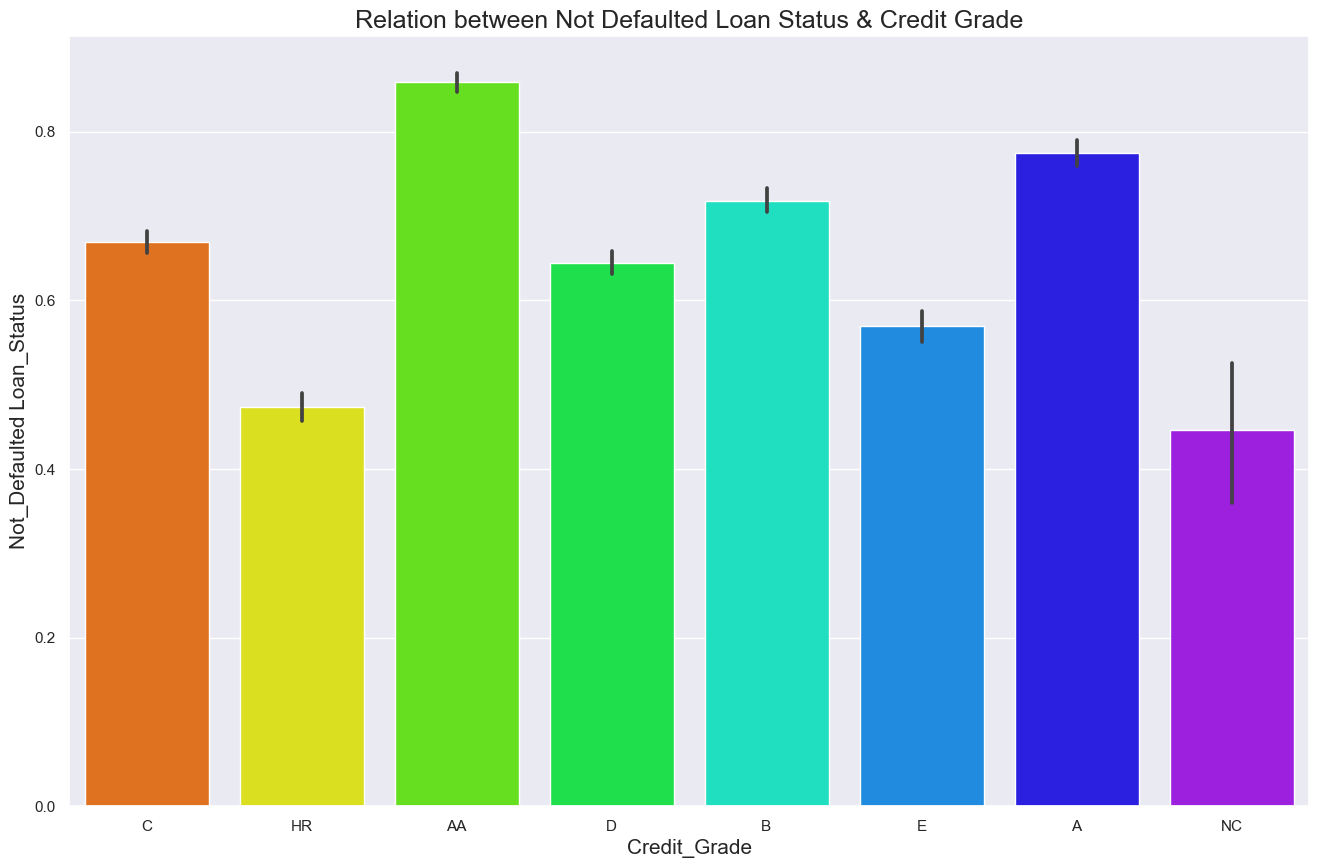

In [ ]:
plt.figure(figsize=(16,10))
sns.barplot('CreditGrade', 'Not_Defaulted_Loan', data = df2, palette='gist_rainbow')
XY_Labels ("Credit_Grade", "Not_Defaulted Loan_Status")
plt.title("Relation between Not Defaulted Loan Status & Credit Grade", fontsize = 18)
plt.show()

### Question 7 : Now we know the Credit Grade is accurate and is a tool that is used by the organization in determining the person’s creditworthiness. Now we need to understand does the ProsperScore, the custom built risk assesment system is being used in determing borrower’s rate?

In [ ]:
new_df2 = new_df[['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperRating (numeric)', 'ProsperScore', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'CreditScoreRangeLower',
'CreditScoreRangeUpper', 'AvgCreditScore', 'CurrentCreditLines', 'OpenRevolvingAccounts', 'CurrentDelinquencies',
'AmountDelinquent', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'InvestmentFromFriendsCount',
'Defaulted_Loan', 'Not_Defaulted_Loan']].copy()
new_df3 = new_df[['ProsperRating (Alpha)','BorrowerAPR', 'BorrowerRate', 'ProsperScore', 'AvgCreditScore']].copy()

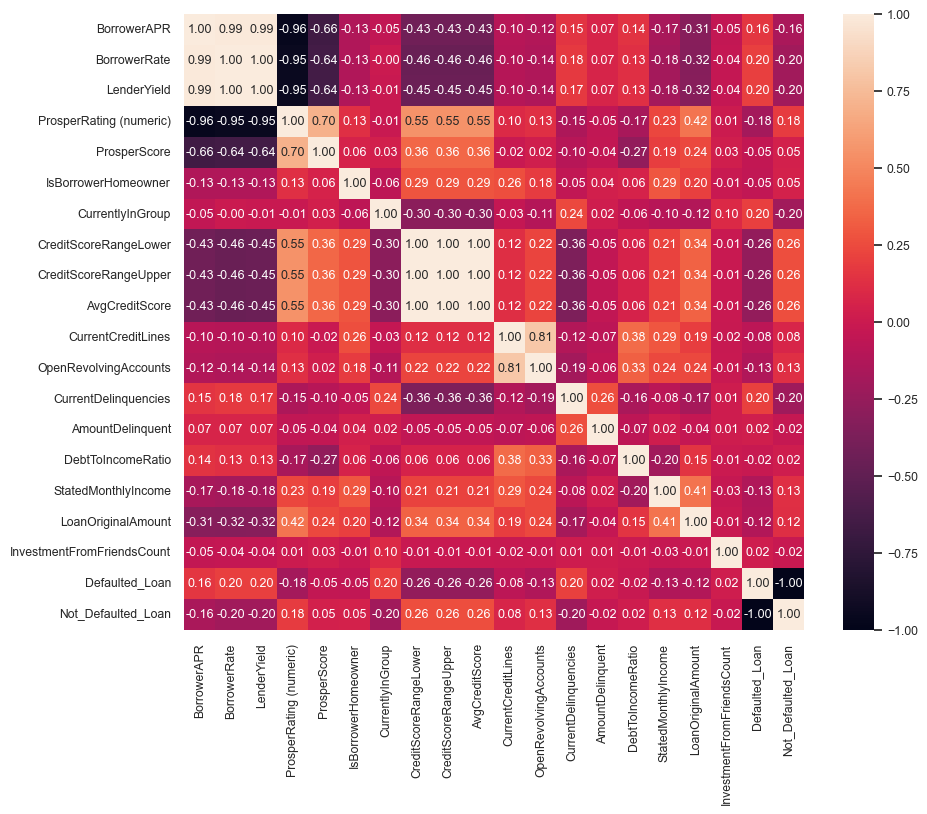

In [ ]:
corr= new_df2.corr()
plt.figure(figsize=(10,8))
sns.set(font_scale = 0.8)
sns.heatmap(new_df2.corr(), annot=True, annot_kws={'size': 9}, fmt= '.2f')
plt.show()

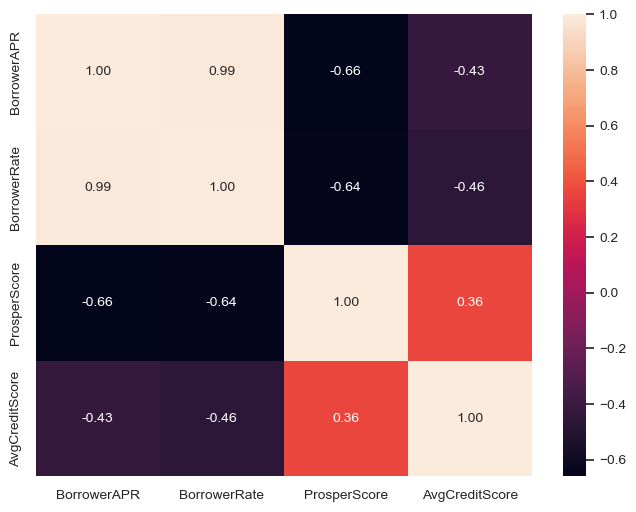

In [ ]:
corr= new_df3.corr()
plt.figure(figsize=(8,6))
sns.set(font_scale = 0.9)
sns.heatmap(new_df3.corr(), annot=True, annot_kws={'size': 10}, fmt= '.2f')
plt.show()

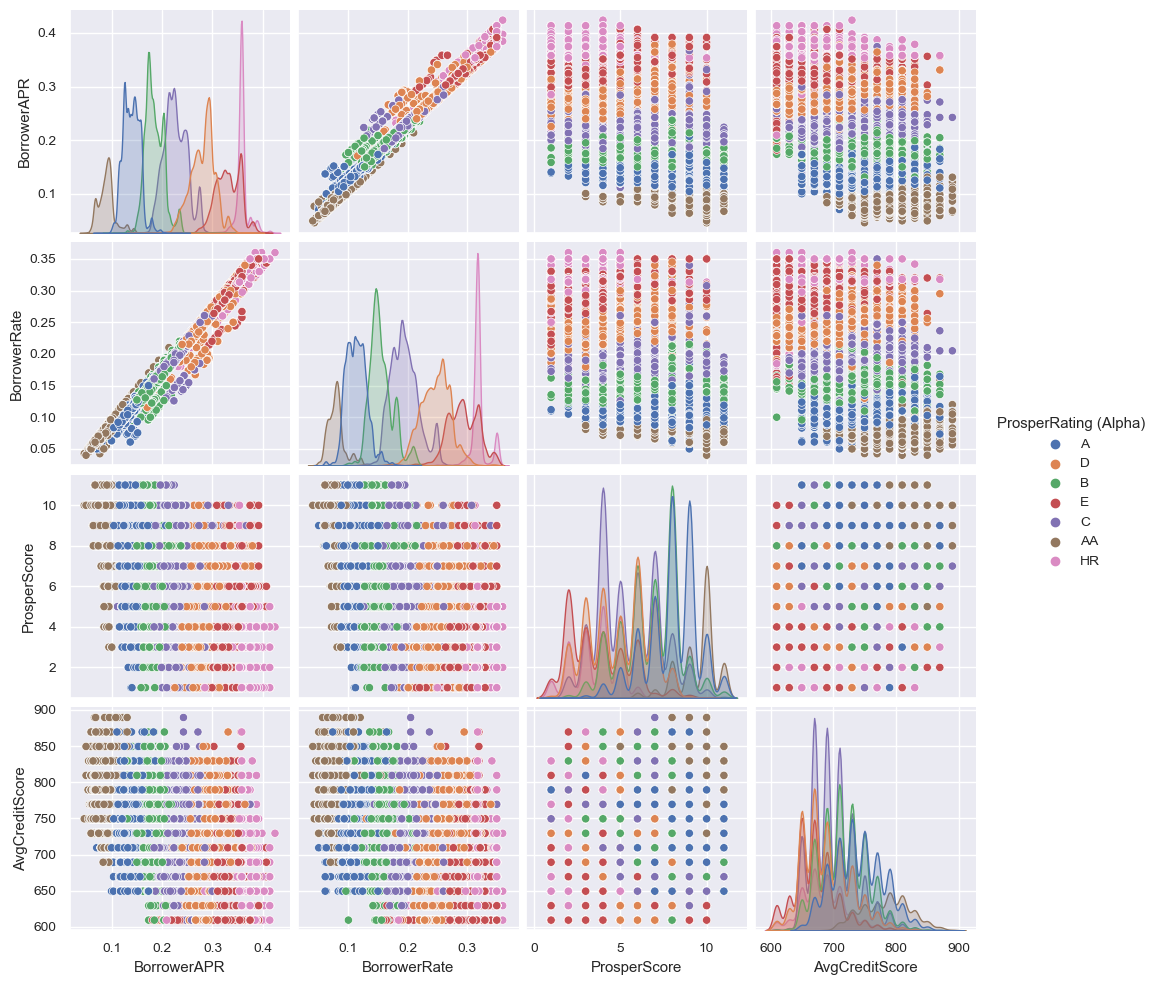

In [ ]:
sns.pairplot(new_df3, hue ='ProsperRating (Alpha)')